# Visualization for quasistatic rate load frame data with DIC

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import h5py
import numpy as np
from PIL import Image

## Dataset
https://doi.org/10.18126/6h74-leb4

## Direct Globus Link
https://app.globus.org/file-manager?origin_id=82f1b5c6-6e9b-11e5-ba47-22000b92c6ec&origin_path=/mdf_open/foam_db_v1.1/

# Fetch Stress-Strain and Other DIC Data
To fetch other files, navigate to the MDF dataset, click the file and then the "Get Link" button.

In [2]:
data_location = 'https://data.materialsdatafacility.org/mdf_open/foam_db_v1.1/quasistatic_rate_data/VN01/VN01_001_003_QS06_00/VN01_001_003_QS06_00_dic.mat'
dest_dic = "./VN01_001_003_QS06_00_dic.mat"

ref_image_loc = "https://data.materialsdatafacility.org/mdf_open/foam_db_v1.1/quasistatic_rate_data/VN01/VN01_001_003_QS06_00/VN01_001_003_QS06_00_images/VN01_001_003_QS06_06-03072022110207-0_static.tiff"
dest_ref = "VN01_001_003_QS06_06-03072022110207-0_static.tiff"
def_image_loc = "https://data.materialsdatafacility.org/mdf_open/foam_db_v1.1/quasistatic_rate_data/VN01/VN01_001_003_QS06_00/VN01_001_003_QS06_00_images/VN01_001_003_QS06_06-03072022123256-545.tiff"
dest_def = "VN01_001_003_QS06_06-03072022123256-545.tiff"

In [3]:
#set up url reader
r_dic_data = requests.get(data_location)
r_ref_img = requests.get(ref_image_loc)
r_def_img = requests.get(def_image_loc)

#open the DIC data
open(dest_dic , 'wb+').write(r_dic_data.content)
dic_data = h5py.File(dest_dic)

#open the DIC data
open(dest_ref , 'wb+').write(r_ref_img.content)
ref_image = Image.open(dest_ref)

#open the DIC data
open(dest_def , 'wb+').write(r_def_img.content)
def_image = Image.open(dest_def)


# Show DIC Dataset Items

In [4]:
list(dic_data['complete_data'].items())

[('E', <HDF5 dataset "E": shape (2, 435), type "<f8">),
 ('F', <HDF5 dataset "F": shape (435, 1), type "|O">),
 ('area', <HDF5 dataset "area": shape (2, 1), type "<f8">),
 ('disp', <HDF5 dataset "disp": shape (435, 1), type "<f8">),
 ('dm', <HDF5 dataset "dm": shape (1, 1), type "<f8">),
 ('e', <HDF5 dataset "e": shape (2, 435), type "<f8">),
 ('eng_strain', <HDF5 dataset "eng_strain": shape (435, 1), type "<f8">),
 ('eng_stress', <HDF5 dataset "eng_stress": shape (435, 1), type "<f8">),
 ('force', <HDF5 dataset "force": shape (435, 1), type "<f8">),
 ('gridPoints', <HDF5 dataset "gridPoints": shape (2, 1), type "|O">),
 ('height', <HDF5 dataset "height": shape (2, 1), type "<f8">),
 ('px2m', <HDF5 dataset "px2m": shape (1, 1), type "<f8">),
 ('reporting_table',
  <HDF5 group "/complete_data/reporting_table" (17 members)>),
 ('save_loc', <HDF5 dataset "save_loc": shape (180, 1), type "<u2">),
 ('time', <HDF5 dataset "time": shape (435, 1), type "<f8">),
 ('u_inc', <HDF5 dataset "u_inc"

#Show the Reference and Deformed Images
This is similar to the visualization in Fig3a (bottom) in the manuscript.

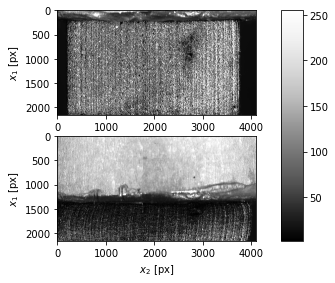

In [5]:
#show both images
plt.subplot(211)
plt.imshow(ref_image,cmap='Greys_r',interpolation=None)
plt.ylabel('$x_1$ [px]')

plt.subplot(212)
plt.imshow(def_image,cmap='Greys_r',interpolation=None)
plt.ylabel('$x_1$ [px]')
plt.xlabel('$x_2$ [px]')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.75, 0.1, 0.05, 0.8])
plt.colorbar(cax=cax)

plt.show()

# Load and Plot the Engineering Stress and Strains

In [12]:
#get the time, stress, aixial strain and transverse strain components 
#from the complete dataset. Use compressive stress and strain to
#put it in quadrant 1 for plotting
time_all = np.array(dic_data['complete_data']['time'])
eng_stress_c = -1.0*(np.array(dic_data['complete_data']['eng_stress']))
strain_e11 = (np.array(dic_data['complete_data']['E'][1, :]) - 1)
strain_e22_c = -1.0*(np.array(dic_data['complete_data']['E'][0, :]) - 1)

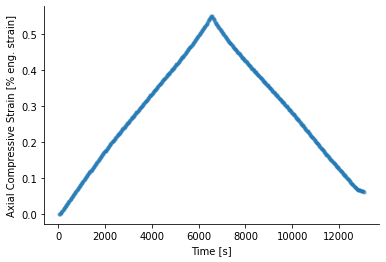

In [15]:
# plot the axial strain vs time: fig 3a (top) in the manuscript
fig = plt.figure()

ax = plt.scatter(time_all, strain_e22_c, s=10, alpha=0.5)

plt.xlabel("Time [s]")
plt.ylabel("Axial Compressive Strain [% eng. strain]")
sns.despine()
plt.show()



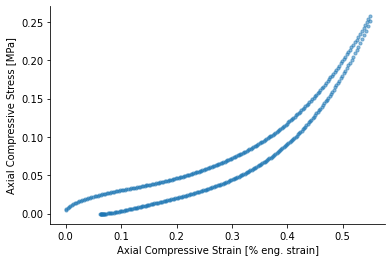

In [8]:
# plot the axial stress vs strain: fig 3d (left) in the manuscript
fig = plt.figure()

ax = plt.scatter(strain_e22_c, eng_stress_c, s=10, alpha=0.5)

plt.xlabel("Axial Compressive Strain [% eng. strain]")
plt.ylabel("Axial Compressive Stress [MPa]")
sns.despine()
plt.show()


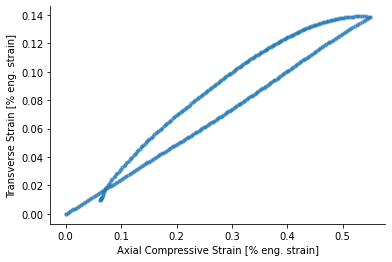

In [16]:
# plot the axial vs transverse strain: fig 3d (right) in the manuscript
fig = plt.figure()

ax = plt.scatter(strain_e22_c, strain_e11, s=10, alpha=0.5)

plt.xlabel("Axial Compressive Strain [% eng. strain]")
plt.ylabel("Transverse Strain [% eng. strain]")
sns.despine()
plt.show()

#Contour Plots of Displacement at Two Stress Levels

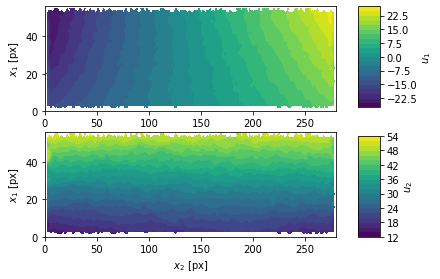

In [17]:
#Show at close to the start of the plateau - this is similar to fig 3b

#list(dic_data[dic_data['complete_data']['u_total'][30][0]])

disp_field_data_plateau = dic_data[dic_data['complete_data']['u_total'][30][0]]

u1_field_data_plateau = disp_field_data_plateau[0,0]
u2_field_data_plateau = disp_field_data_plateau[1,0]

#show both images

ax1 = plt.subplot(211)
#use rot90 since the matlab data is on an ndgrid-type mesh and plt assumes an mgrid format
plt.contourf(np.rot90(dic_data[u1_field_data_plateau]),levels=20)
plt.ylabel('$x_1$ [px]')
cax = plt.axes([0.85, 0.55, 0.05, 0.35])
plt.colorbar(cax=cax,label='$u_1$')

ax2 = plt.subplot(212)
plt.contourf(np.rot90(dic_data[u2_field_data_plateau]),levels=20)
plt.ylabel('$x_1$ [px]')
plt.xlabel('$x_2$ [px]')
cax = plt.axes([0.85, 0.1, 0.05, 0.35])
plt.colorbar(cax=cax,label='$u_2$')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)

plt.show()


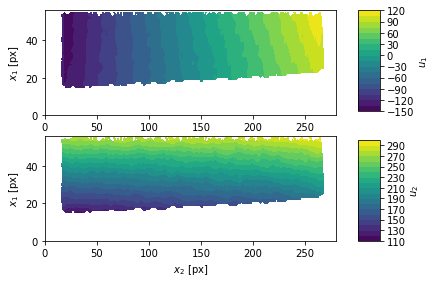

In [11]:
#Show at near max strain - this is fig 3c
#list(dic_data[dic_data['complete_data']['u_total'][201][0]])

disp_field_data_plateau = dic_data[dic_data['complete_data']['u_total'][201][0]]

u1_field_data_plateau = disp_field_data_plateau[0,0]
u2_field_data_plateau = disp_field_data_plateau[1,0]

#show both images

ax1 = plt.subplot(211)
#use rot90 since the Matlab data is on an ndgrid-type mesh and plt assumes an mgrid format
plt.contourf(np.rot90(dic_data[u1_field_data_plateau]),levels=20)
plt.ylabel('$x_1$ [px]')
cax = plt.axes([0.85, 0.55, 0.05, 0.35])
plt.colorbar(cax=cax,label='$u_1$')

ax2 = plt.subplot(212)
plt.contourf(np.rot90(dic_data[u2_field_data_plateau]),levels=20)
plt.ylabel('$x_1$ [px]')
plt.xlabel('$x_2$ [px]')
cax = plt.axes([0.85, 0.1, 0.05, 0.35])
plt.colorbar(cax=cax,label='$u_2$')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)

plt.show()
